In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# 1. Previous Labs

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
cols = []
for colname in customer_df.columns:
    cols.append(colname.lower().replace(' ', '_'))
customer_df.columns = cols

customer_df.rename(columns={'employmentstatus':'employment_status'}, inplace = True)

In [4]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

In [5]:
numerical_df = customer_df.select_dtypes(include = np.number)

In [6]:
def discrete_continuous(df):
    
    discrete_df = pd.DataFrame()
    continuous_df = pd.DataFrame()
    
    for column in df.columns:
        if df[column].nunique() <= 100:
            discrete_df[column] = df[column]
        else:
            continuous_df[column] = df[column]
    
    return discrete_df, continuous_df

In [7]:
discrete_df, continuous_df = discrete_continuous(numerical_df)

In [8]:
def plot(df):
    for column in df.columns:
        if df[column].nunique() <= 100:
            plt.figure(figsize=(20, 6))
            sns.countplot(x=df[column], data=df)
            plt.title(f'Count Plot of {column}')
            plt.xticks(rotation=90)  # Rotate x-axis labels vertically
            plt.show()
        else:
            plt.figure(figsize=(8, 6))
            sns.histplot(x=df[column], bins=20, kde=True)
            plt.title(f'Histogram of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()

In [9]:
continuous_df = continuous_df[(continuous_df['customer_lifetime_value'] <= 65000)] # I have corrected this, in the previous lab, I accidentally removed the outliers of the target.
customer_df = customer_df[(customer_df['customer_lifetime_value'] <= 65000)]
numerical_df = numerical_df[(numerical_df['customer_lifetime_value'] <= 65000)]

In [10]:
numerical_df.to_csv('numerical_230823.csv', index=False)

In [11]:
categorical_df = customer_df.select_dtypes(include = np.object)
categorical_df.drop('customer', axis=1, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_4012\2569495330.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_df = customer_df.select_dtypes(include = np.object)


In [12]:
substitutions = {
    'Offer1': 'O1',
    'Offer2': 'O2',
    'Offer3': 'O3',
    'Offer4': 'O4'
}

categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].map(substitutions)

In [13]:
substitutions2 = {
    'Employed': 'Active',
    'Unemployed': 'Inactive',
    'Medical Leave': 'Inactive',
    'Disabled': 'Inactive',
    'Retired': 'Inactive'
}

categorical_df['employment_status'] = categorical_df['employment_status'].map(substitutions2)

In [14]:
substitutions3 = {
    'Bachelor': 'Bachelor',
    'College': 'College',
    'High School or Below': 'High School or Below',
    'Master': 'Higher',
    'Doctor': 'Higher'
}

categorical_df['education'] = categorical_df['education'].map(substitutions3)

In [15]:
substitutions4 = {
    'Four-Door Car': 'Four-Door Car',
    'Two-Door Car': 'Two-Door Car',
    'SUV': 'SUV',
    'Sports Car': 'Sports Car',
    'Luxury SUV': 'Luxury',
    'Luxury Car': 'Luxury'
}
categorical_df['vehicle_class'] = categorical_df['vehicle_class'].map(substitutions4)

In [16]:
categorical_df.to_csv('categorical_230821.csv', index=False)

# 2. Plot all the categorical variables with the proper plot. What can you see?

<Figure size 1000x600 with 0 Axes>

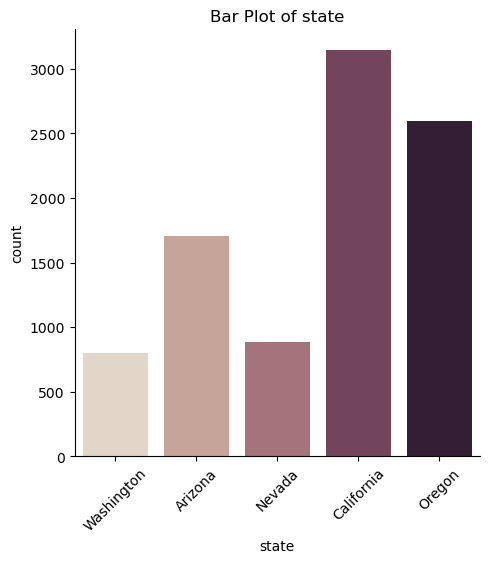

<Figure size 1000x600 with 0 Axes>

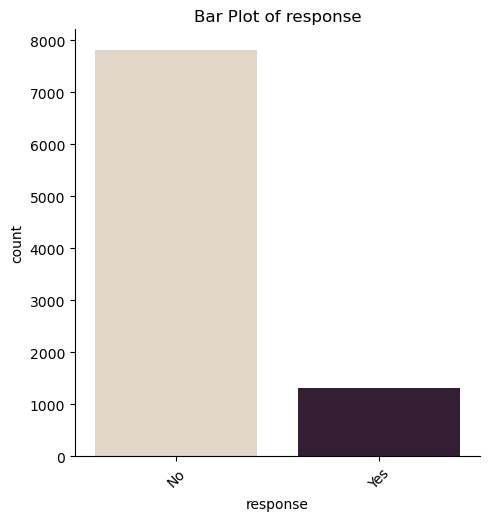

<Figure size 1000x600 with 0 Axes>

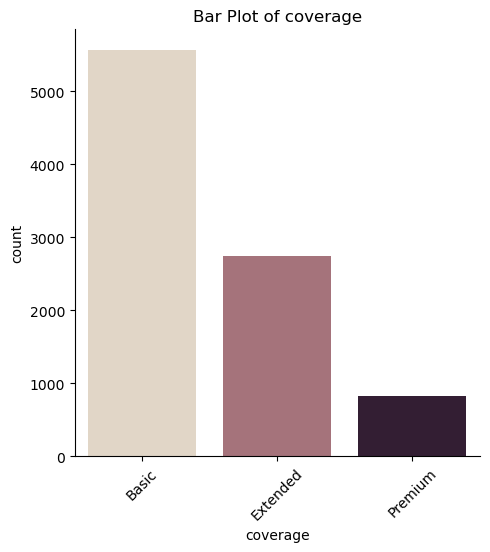

<Figure size 1000x600 with 0 Axes>

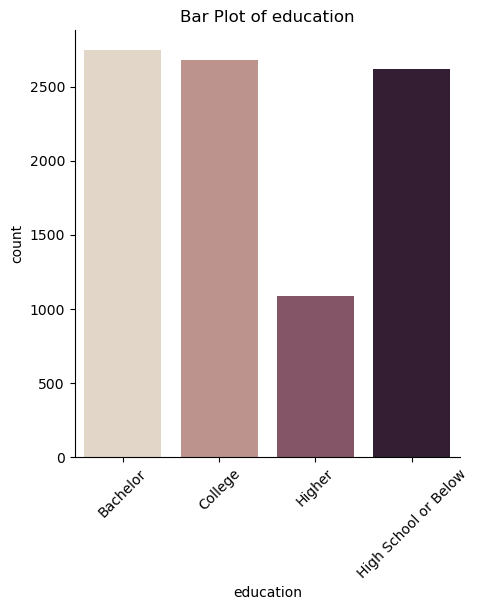

<Figure size 1000x600 with 0 Axes>

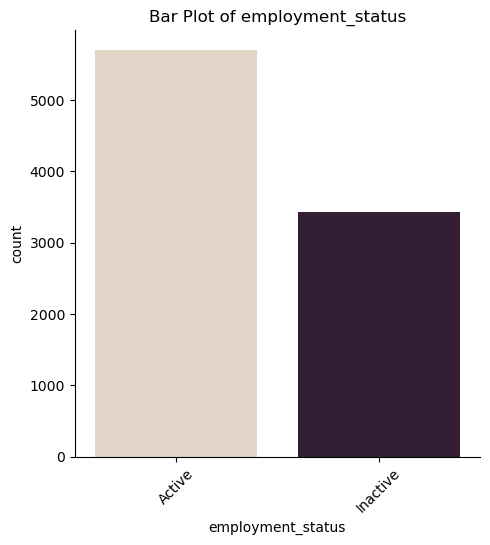

<Figure size 1000x600 with 0 Axes>

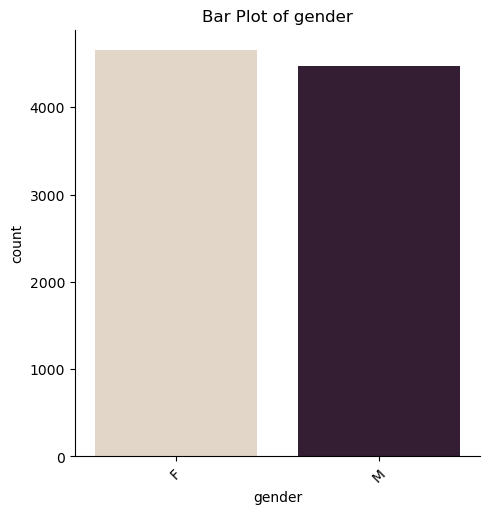

<Figure size 1000x600 with 0 Axes>

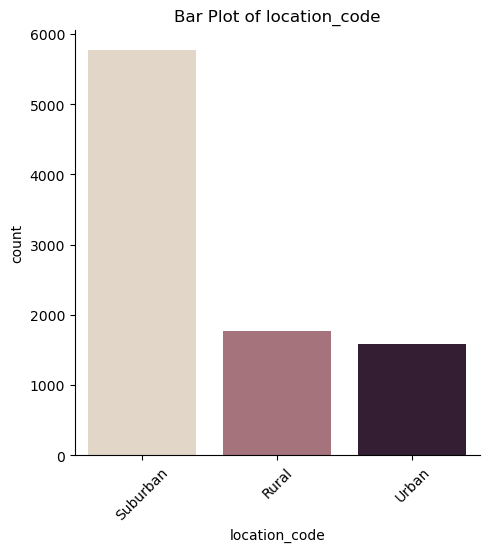

<Figure size 1000x600 with 0 Axes>

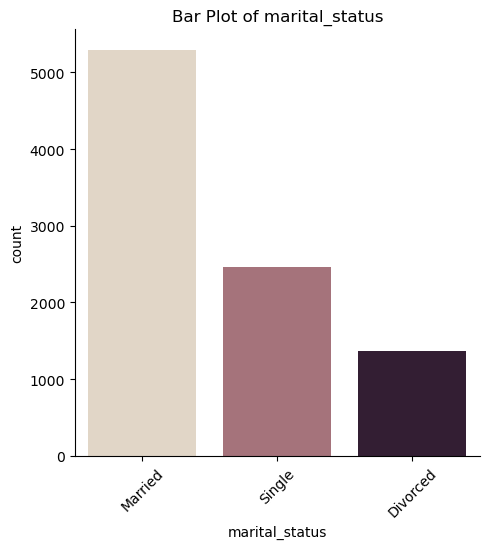

<Figure size 1000x600 with 0 Axes>

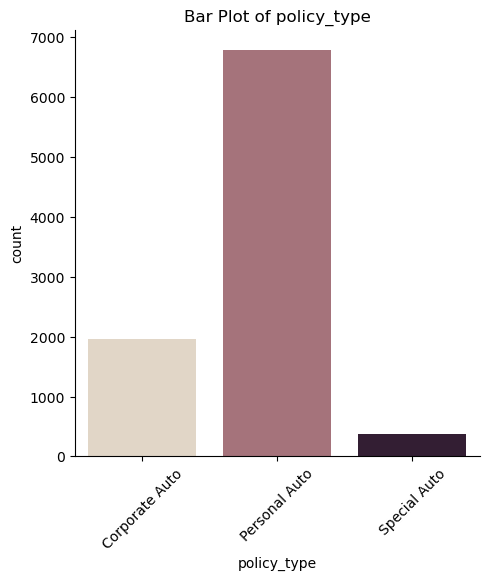

<Figure size 1000x600 with 0 Axes>

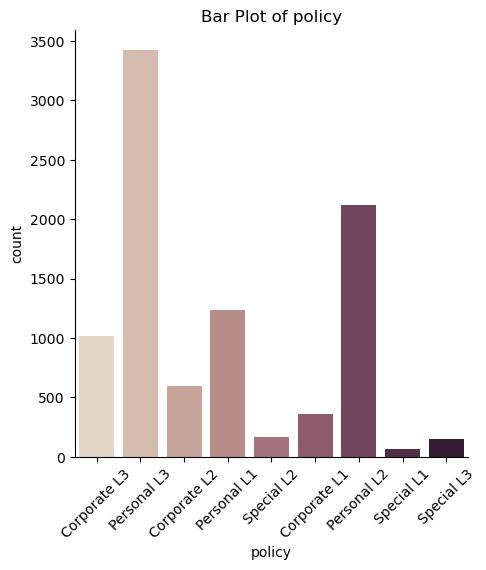

<Figure size 1000x600 with 0 Axes>

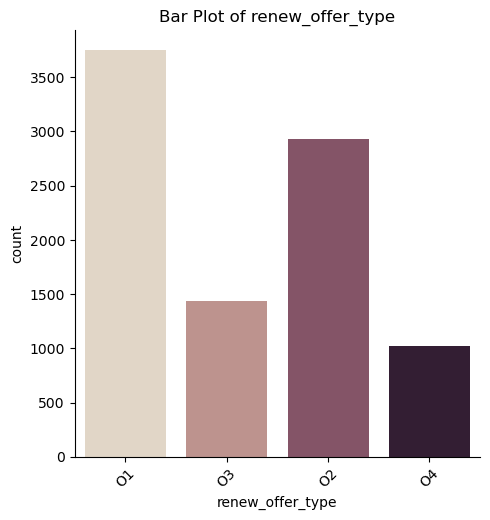

<Figure size 1000x600 with 0 Axes>

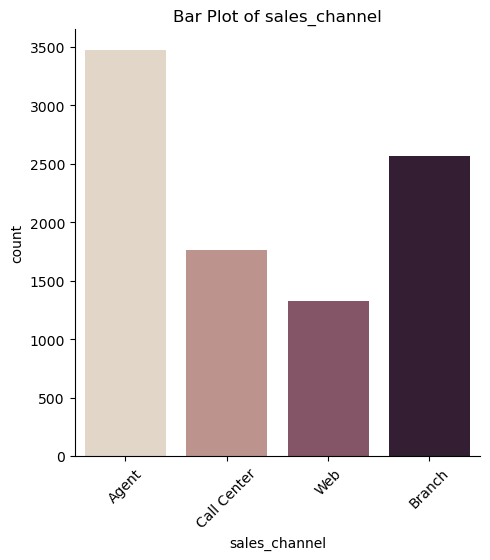

<Figure size 1000x600 with 0 Axes>

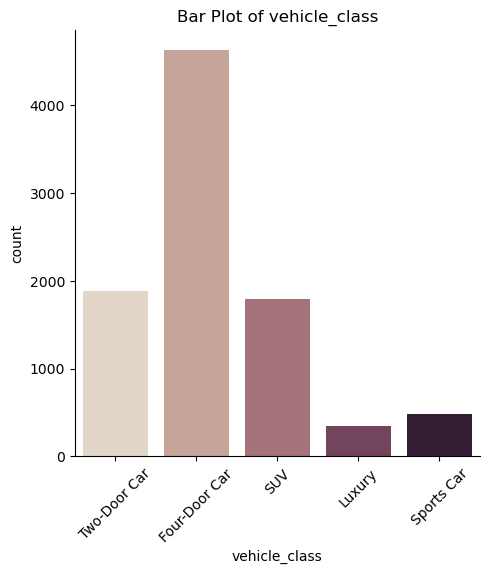

<Figure size 1000x600 with 0 Axes>

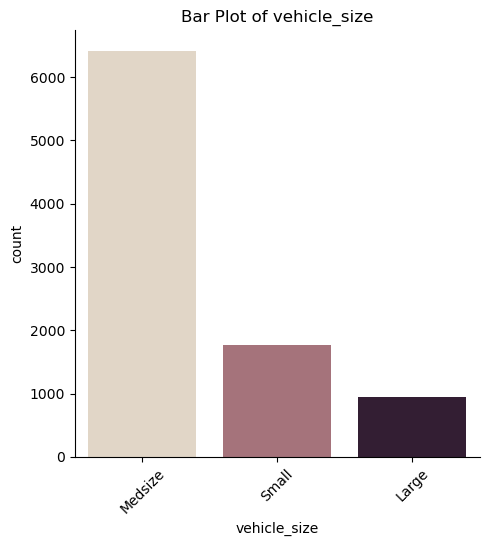

In [17]:
for col in categorical_df.columns:
    plt.figure(figsize = (10, 6))
    sns.catplot(data = categorical_df, x=col, kind="count", palette="ch:.25")
    plt.title(f'Bar Plot of {col}')
    plt.xticks(rotation = 45)
    plt.show()

In [25]:
total_claim_df = customer_df[['total_claim_amount']].copy()
categorical_target_df = pd.concat([categorical_df, total_claim_df], axis=1)

<Figure size 1000x600 with 0 Axes>

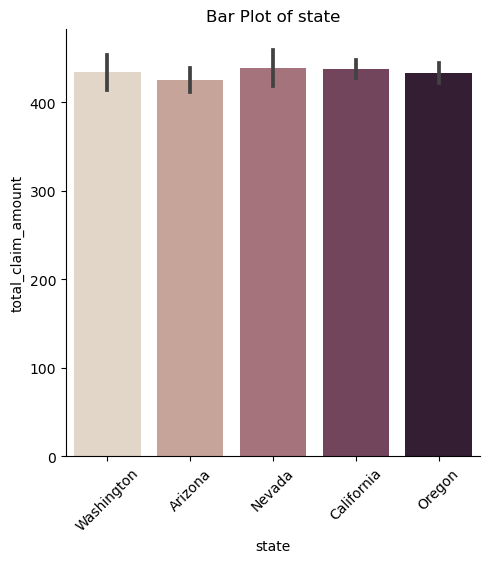

<Figure size 1000x600 with 0 Axes>

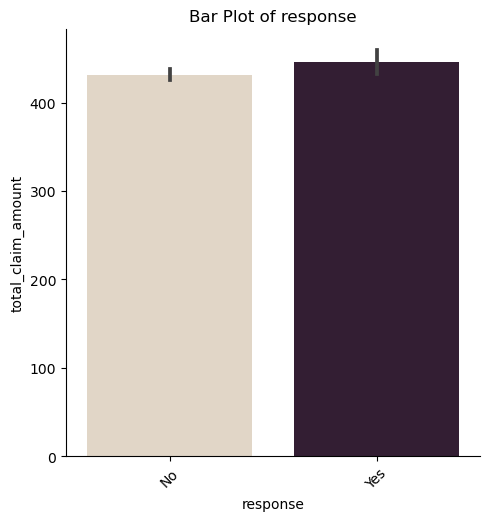

<Figure size 1000x600 with 0 Axes>

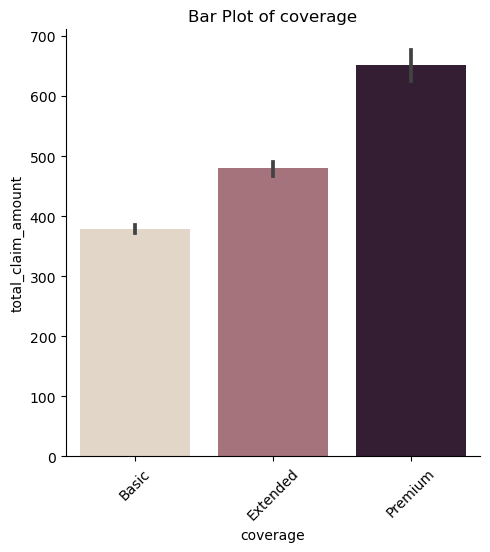

<Figure size 1000x600 with 0 Axes>

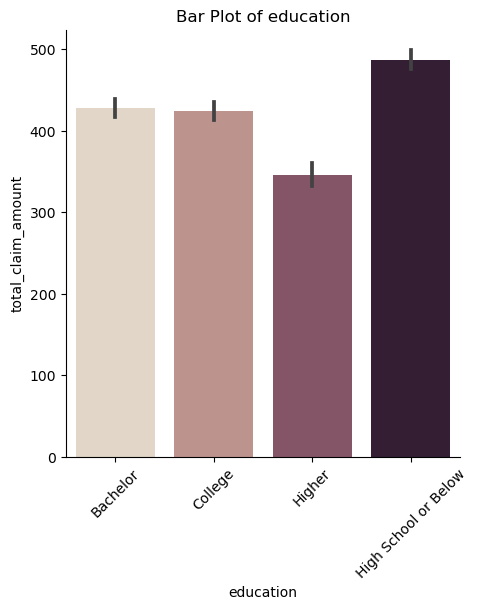

<Figure size 1000x600 with 0 Axes>

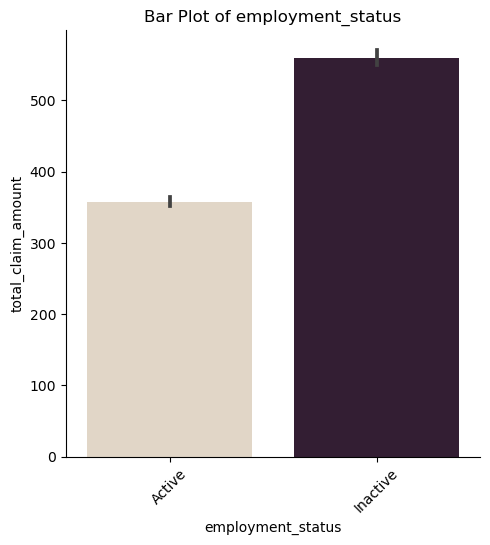

<Figure size 1000x600 with 0 Axes>

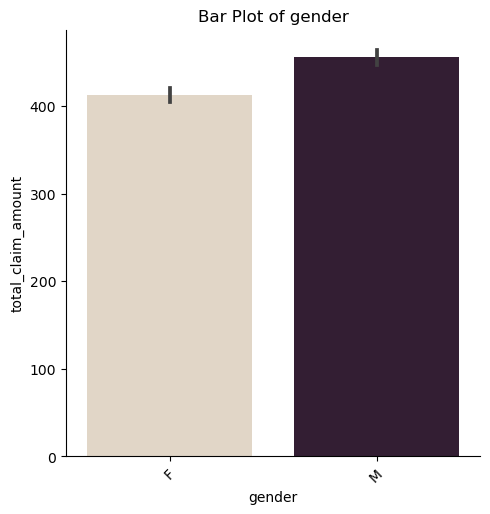

<Figure size 1000x600 with 0 Axes>

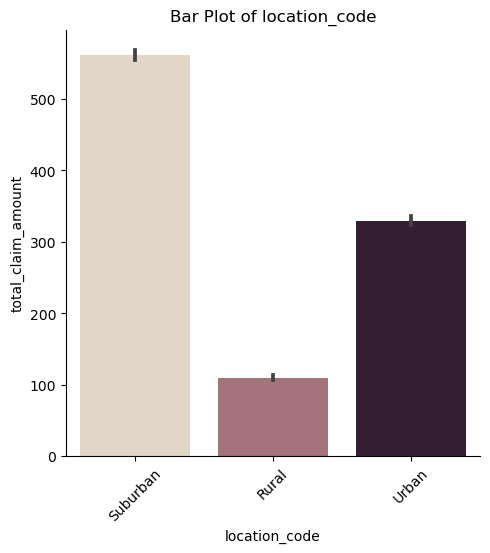

<Figure size 1000x600 with 0 Axes>

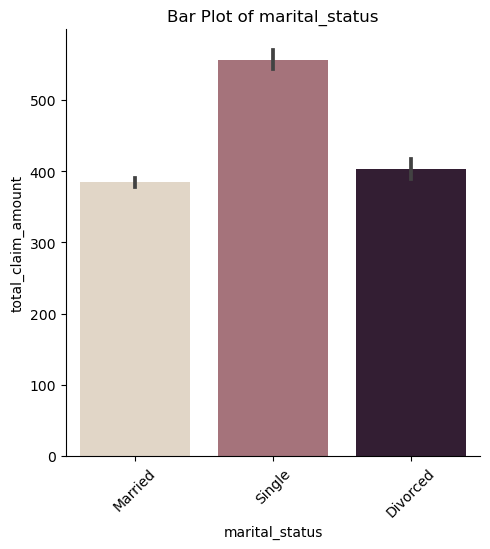

<Figure size 1000x600 with 0 Axes>

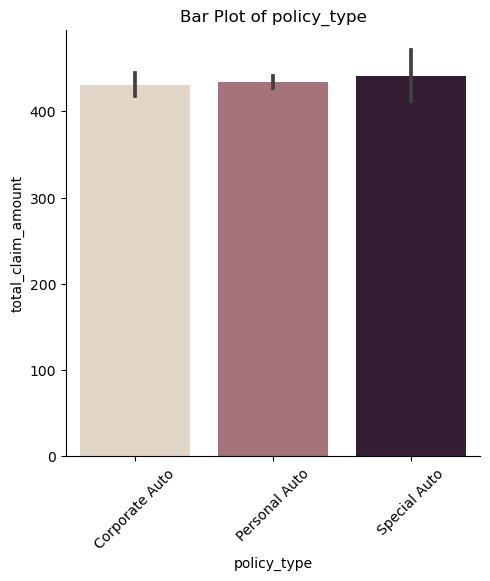

<Figure size 1000x600 with 0 Axes>

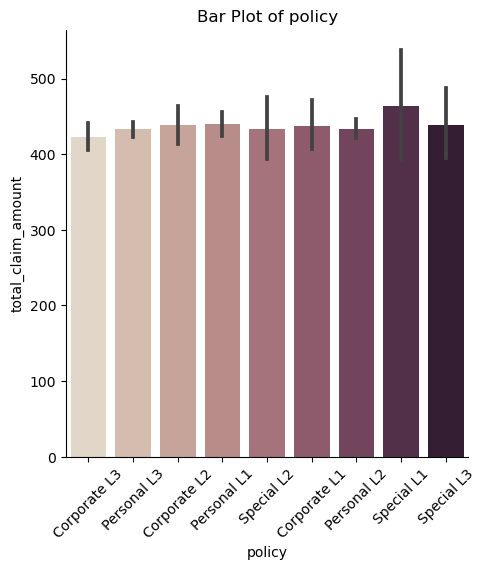

<Figure size 1000x600 with 0 Axes>

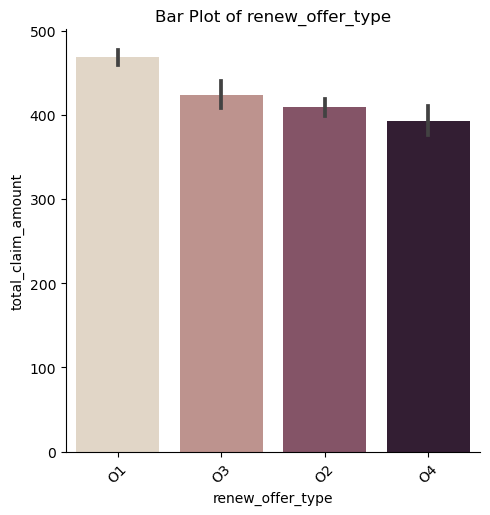

<Figure size 1000x600 with 0 Axes>

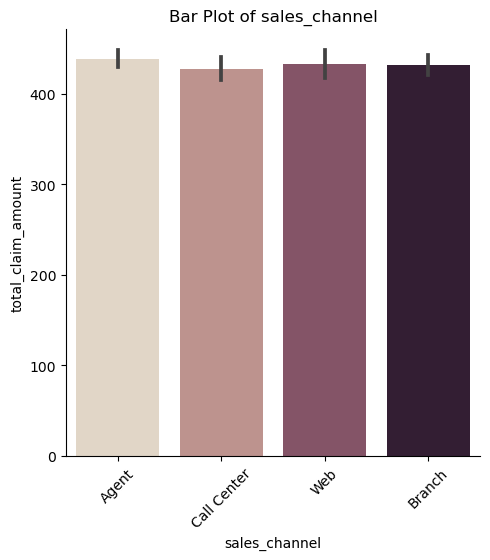

<Figure size 1000x600 with 0 Axes>

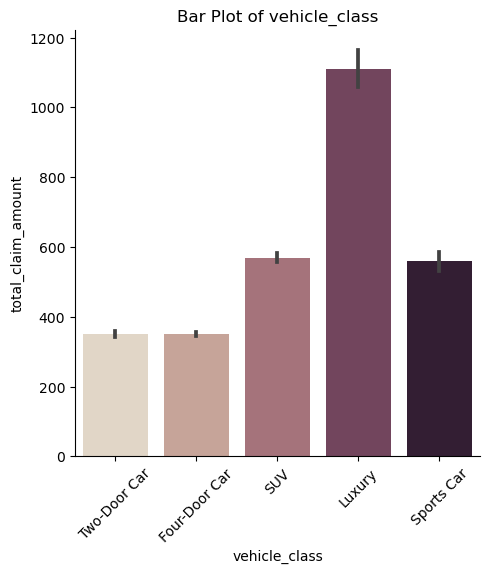

<Figure size 1000x600 with 0 Axes>

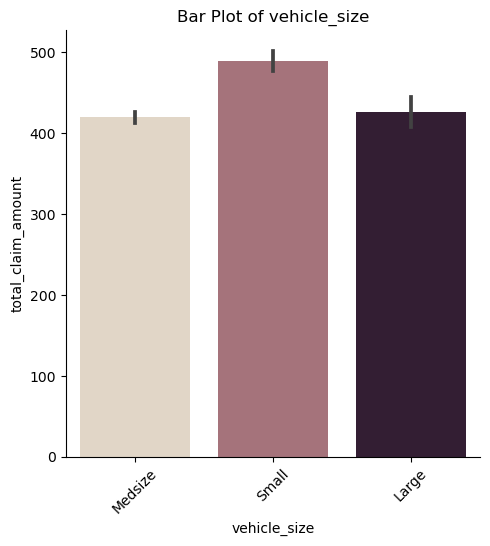

In [27]:
for col in categorical_df.columns:
    plt.figure(figsize = (10, 6))
    sns.catplot(data=categorical_target_df, x=col, y="total_claim_amount", kind="bar", palette="ch:.25")
    plt.title(f'Bar Plot of {col}')
    plt.xticks(rotation = 45)
    plt.show()

The variables don´t follow a normal distribution. Gender doesn´t give much information.

# 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [38]:
categorical_target_df.head(60)

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,total_claim_amount
0,Washington,No,Basic,Bachelor,Active,F,Suburban,Married,Corporate Auto,Corporate L3,O1,Agent,Two-Door Car,Medsize,384.811147
1,Arizona,No,Extended,Bachelor,Inactive,F,Suburban,Single,Personal Auto,Personal L3,O3,Agent,Four-Door Car,Medsize,1131.464935
2,Nevada,No,Premium,Bachelor,Active,F,Suburban,Married,Personal Auto,Personal L3,O1,Agent,Two-Door Car,Medsize,566.472247
3,California,No,Basic,Bachelor,Inactive,M,Suburban,Married,Corporate Auto,Corporate L2,O1,Call Center,SUV,Medsize,529.881344
4,Washington,No,Basic,Bachelor,Active,M,Rural,Single,Personal Auto,Personal L1,O1,Agent,Four-Door Car,Medsize,138.130879
5,Oregon,Yes,Basic,Bachelor,Active,F,Rural,Married,Personal Auto,Personal L3,O2,Web,Two-Door Car,Medsize,159.383042
6,Oregon,Yes,Basic,College,Active,F,Suburban,Married,Corporate Auto,Corporate L3,O1,Agent,Four-Door Car,Medsize,321.600000
7,Arizona,No,Premium,Higher,Inactive,M,Urban,Single,Corporate Auto,Corporate L3,O1,Agent,Four-Door Car,Medsize,363.029680
8,Oregon,Yes,Basic,Bachelor,Inactive,M,Suburban,Divorced,Corporate Auto,Corporate L3,O1,Agent,Four-Door Car,Medsize,511.200000
9,Oregon,No,Extended,College,Active,F,Urban,Married,Special Auto,Special L2,O2,Branch,Four-Door Car,Medsize,425.527834


In [39]:
result = categorical_target_df.groupby('gender')['total_claim_amount'].sum()
result

gender
F    1.922116e+06
M    2.037684e+06
Name: total_claim_amount, dtype: float64

In [35]:
categorical_target_df.groupby('state')['total_claim_amount'].sum()

state
Arizona       7.243905e+05
California    1.378161e+06
Nevada        3.869780e+05
Oregon        1.125005e+06
Washington    3.452649e+05
Name: total_claim_amount, dtype: float64

In [36]:
categorical_target_df.groupby('response')['total_claim_amount'].sum()

response
No     3.376326e+06
Yes    5.834738e+05
Name: total_claim_amount, dtype: float64

In [41]:
categorical_target_df.groupby('policy_type')['total_claim_amount'].sum()

policy_type
Corporate Auto    8.468544e+05
Personal Auto     2.946447e+06
Special Auto      1.664987e+05
Name: total_claim_amount, dtype: float64

In [42]:
categorical_target_df.groupby('sales_channel')['total_claim_amount'].sum()

sales_channel
Agent          1.523091e+06
Branch         1.108457e+06
Call Center    7.545312e+05
Web            5.737207e+05
Name: total_claim_amount, dtype: float64

I´ll drop gender column.

In [43]:
categorical_df = categorical_df.drop(['gender'], axis = 1)

In [44]:
categorical_df

,state,response,coverage,education,employment_status,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Active,Suburban,Married,Corporate Auto,Corporate L3,O1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Inactive,Suburban,Single,Personal Auto,Personal L3,O3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Active,Suburban,Married,Personal Auto,Personal L3,O1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Inactive,Suburban,Married,Corporate Auto,Corporate L2,O1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Active,Rural,Single,Personal Auto,Personal L1,O1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Active,Urban,Married,Personal Auto,Personal L1,O2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Active,Suburban,Divorced,Corporate Auto,Corporate L3,O1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Inactive,Suburban,Single,Corporate Auto,Corporate L2,O1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Active,Suburban,Married,Personal Auto,Personal L2,O3,Branch,Four-Door Car,Large


# 4. Make any changes you feel are necessary.

In [45]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [46]:
numerical_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [47]:
categorical_df.columns

Index(['state', 'response', 'coverage', 'education', 'employment_status',
       'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

There´re too many columns. I´ll group some.

In [48]:
substitutions5 = {
    'Corporate L1': 'Corporate L1',
    'Corporate L2': 'Corporate L2',
    'Corporate L3': 'Corporate L3',
    'Personal L1': 'Personal L1',
    'Personal L2': 'Personal L2',
    'Personal L3': 'Personal L3',
    'Special L1': 'Special',
    'Special L2': 'Special',
    'Special L3': 'Special',    
}
categorical_df['policy'] = categorical_df['policy'].map(substitutions5)

# 5. Plot time variable. Can you extract something from it?

In [49]:
customer_df['effective_to_date'].value_counts

<bound method IndexOpsMixin.value_counts of 0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9129, dtype: datetime64[ns]>

<Axes: xlabel='effective_to_date'>

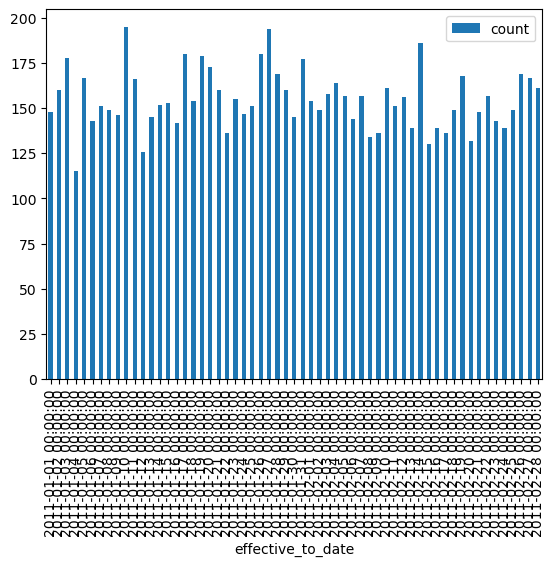

In [50]:
grouped_date = customer_df.groupby('effective_to_date').size().to_frame("count").reset_index()

grouped_date.plot(kind='bar', x='effective_to_date', y='count')

# 6. The time variable can be useful. You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful.

The year and time are unique, so I´ll only keep the month and the day.

In [51]:
customer_df['month'] = customer_df['effective_to_date'].dt.month
customer_df['day'] = customer_df['effective_to_date'].dt.day

In [52]:
customer_df.drop(['effective_to_date'], axis = 1, inplace = True)

<Axes: xlabel='month'>

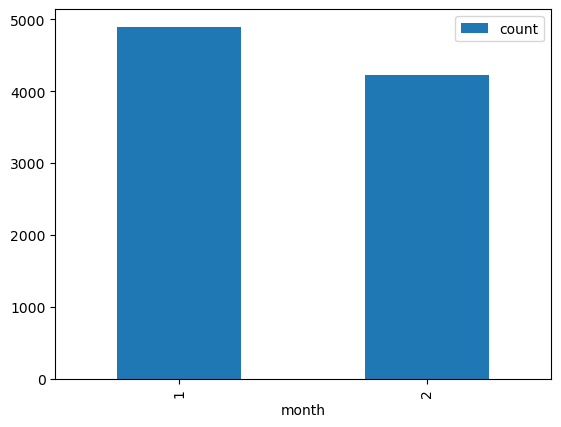

In [53]:
grouped_month = customer_df.groupby('month').size().to_frame("count").reset_index()

grouped_month.plot(kind='bar', x='month', y='count')

In [54]:
grouped_month2 = customer_df.groupby('month')['total_claim_amount'].sum()


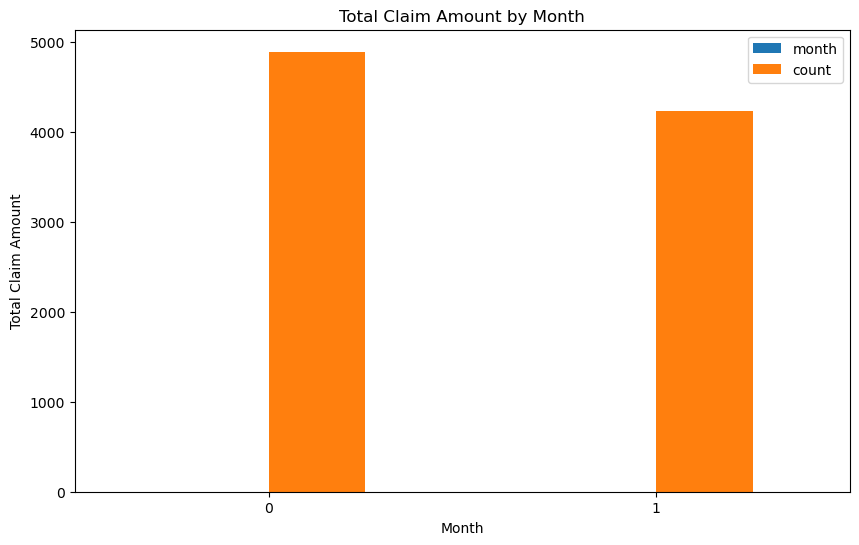

In [58]:
fig, ax = plt.subplots(figsize=(10, 6))
grouped_month.plot(kind='bar', ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount by Month')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='day'>

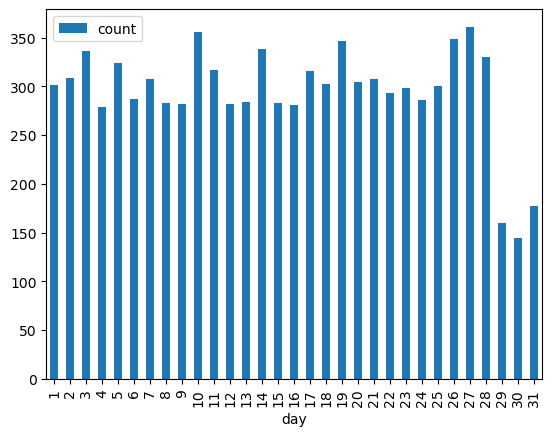

In [56]:
grouped_day = customer_df.groupby('day').size().to_frame("count").reset_index()

grouped_day.plot(kind='bar', x='day', y='count')